#  Personality Classification with ML algorithms

#### This notebook includes following steps:
* Exploratory Data Analysis
* Data Cleaning
* Data Preprocessing
* Model Creation
* Model Training
* Model Evaluation and Selection

### Importing Libraries

In [4]:
!pip install contractions

In [5]:
!pip install nltk

In [6]:
!pip install wordcloud

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from itertools import chain
import contractions
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from nltk import ngrams

### Load Dataset

In [9]:
df = pd.read_csv("../data/mbti_1.csv")
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


#### some information about dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [12]:
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


### Class Distribution

In [14]:
_classes = df.type.unique()
print(_classes)

['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


In [25]:
def show_class_distribution(df, x="type", figsize=(16,4), title="Distribution of Personality Types", xticks_size=10, palette="husl"):
    plt.figure(figsize=figsize)
    sns.countplot(x=x, data=df, palette=palette)
    plt.xlabel("Personality Types", size=15)
    plt.ylabel("Counts", size=15)
    plt.xticks(size=xticks_size)
    plt.title(title, size=20)
    plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_9556\3439723611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=df, palette=palette)


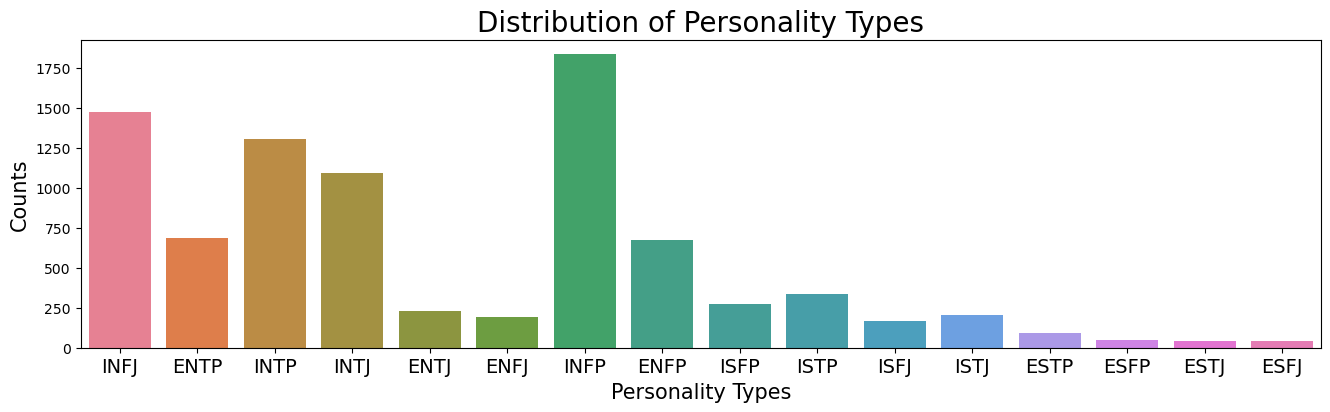

In [27]:
show_class_distribution(df,xticks_size=14)

In [33]:
def divide_types(df):
    # Add the new columns for each type
    df["E-I"] = ""
    df["N-S"] = ""
    df["F-T"] = ""
    df["J-P"] = ""
    
    # Iterate over each row and update the new columns
    for index, row in df.iterrows():
        df.at[index, "E-I"] = "E" if row["type"][0] == "E" else "I"
        df.at[index, "N-S"] = "N" if row["type"][1] == "N" else "S"
        df.at[index, "F-T"] = "F" if row["type"][2] == "F" else "T"
        df.at[index, "J-P"] = "J" if row["type"][3] == "J" else "P"
        
    return df

# Apply the function to the dataframe
df = divide_types(df)

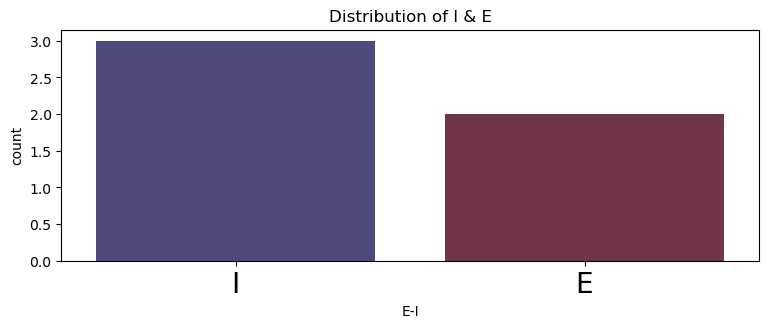

In [35]:
show_class_distribution(df, x="E-I", title="Distribution of I & E", figsize=(9,3), xticks_size=20, palette="icefire")

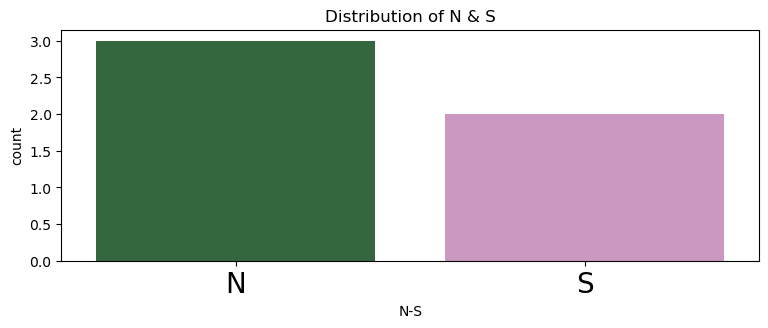

In [37]:
show_class_distribution(df, x="N-S", title="Distribution of N & S", figsize=(9,3), xticks_size=20, palette="cubehelix")

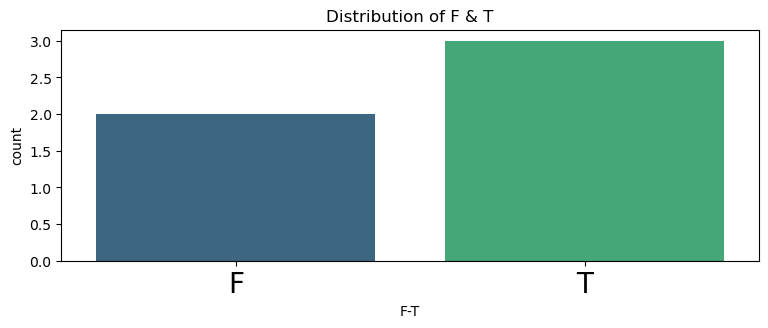

In [39]:
show_class_distribution(df, x="F-T", title="Distribution of F & T", figsize=(9,3), xticks_size=20, palette="viridis")

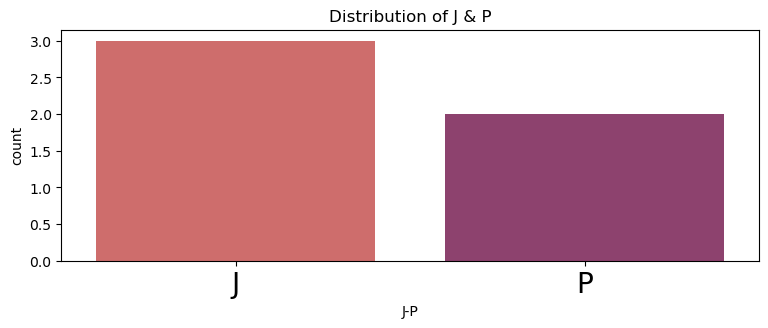

In [41]:
show_class_distribution(df, x="J-P", title="Distribution of J & P", figsize=(9,3), xticks_size=20, palette="flare")


In [47]:
def fix_contractions(df, column_name = "posts", new_column="cleaned_post"):
    df[new_column] = df[column_name].apply(lambda x: contractions.fix(x))
    return df

data = fix_contractions(df)
     

KeyError: 'posts'